Going to be making predictions on the data using a random forest and coupling this with unsupervised learning to make a nice good old semi-supervised model!

This is going to be different in that I'm utilizing the additional features!

In [177]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D

In [178]:
#df = pd.read_csv('Train_hcp_additional_features.csv') # Check the additional features
df = pd.read_csv('Train_hcp_additional_features.csv') # Check the original features
df.shape

(62, 44)

In [179]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)
X = df.drop(['delta_E'], axis=1)
y = df['delta_E']

In [180]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [181]:
from sklearn.ensemble import RandomForestRegressor

In [182]:
# Random Forest model
# Running the model here
RF_reg = RandomForestRegressor(n_estimators=100, max_depth=4)
RF_reg.fit(X_train, y_train)
predictions_RF = RF_reg.predict(X_test)
predictions2_RF = RF_reg.predict(X_train)

In [183]:
RMSE_test = mean_squared_error(y_test, predictions_RF, squared=False)
RMSE_train = mean_squared_error(y_train, predictions2_RF, squared=False)
Score_test = RF_reg.score(X_test, y_test)
Score_train = RF_reg.score(X_train, y_train)

In [184]:
print('RMSE test',RMSE_test)
print('RMSE train',RMSE_train)
print('Test score',Score_test)
print('Train score',Score_train)

RMSE test 0.09086199944644661
RMSE train 0.05830055767329509
Test score 0.9361518620258853
Train score 0.9683587857360128


Okay lets make that new CSV file!

In [185]:
# Load the trained model

new_data = pd.read_csv('generated_train_hcp_additional_features.csv') #Check the additional features
#new_data = pd.read_csv('generated_train.csv') #Check the original features
new_data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [186]:
predictions = RF_reg.predict(new_data)

In [187]:
predictions_df = pd.DataFrame(predictions, columns=['PredictedTarget'])

# Concatenate the predictions dataframe with the original new_data dataframe
new_data_with_predictions = pd.concat([new_data, predictions_df], axis=1)

In [188]:
df.describe()

r1Cu       r1Co       r1Ni       r1Zn       r1Mg       r2Cu  \
count  62.000000  62.000000  62.000000  62.000000  62.000000  62.000000   
mean    0.467742   0.645161   0.500000   0.709677   0.677419   1.435484   
std     0.783388   0.993368   0.882433   1.014438   0.988030   1.139758   
min     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
25%     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
50%     0.000000   0.000000   0.000000   0.000000   0.000000   1.000000   
75%     1.000000   1.000000   1.000000   1.000000   1.000000   2.000000   
max     3.000000   3.000000   3.000000   3.000000   3.000000   3.000000   

            r2Co       r2Ni       r2Zn       r2Mg  ...  r3 atomic radius  \
count  62.000000  62.000000  62.000000  62.000000  ...         62.000000   
mean    0.403226   0.467742   0.354839   0.338710  ...        135.241935   
std     0.756603   0.783388   0.748699   0.745336  ...          1.905002   
min     0.000000   0.000000   0.000000   0.000000  ...        135.000000   
25%     0.000000   0.000000   0.000000   0.000000  ...        135.000000   
50%     0.000000   0.000000   0.000000   0.000000  ...        135.000000   
75%     1.000000   1.000000   0.000000   0.000000  ...        135.000000   
max     3.000000   3.000000   3.000000   3.000000  ...        150.000000   

       r3 metallic radius  r3 dipole polarizability  r3 lattice constant  \
count           62.000000                 62.000000            62.000000   
mean           118.258065                 46.949516             3.569032   
std              2.367370                  3.476787             0.188894   
min            115.000000                 38.670000             2.510000   
25%            118.000000                 46.500000             3.610000   
50%            118.000000                 46.500000             3.610000   
75%            118.000000                 46.500000             3.610000   
max            136.000000                 71.200000             3.610000   

       r3 VDW radius  r3 ionization energy  r3 electronegativity pauling  \
count      62.000000             62.000000                     62.000000   
mean      195.790323              7.753086                      1.886290   
std         3.052207              0.213296                      0.080922   
min       173.000000              7.639877                      1.310000   
25%       196.000000              7.726380                      1.900000   
50%       196.000000              7.726380                      1.900000   
75%       196.000000              7.726380                      1.900000   
max       201.000000              9.394199                      1.910000   

       r3 electronegativity allen  r3 electronegativity ghosh    delta_E  
count                   62.000000                   62.000000  62.000000  
mean                    10.882435                    0.150568  -0.286929  
std                      0.463375                    0.003933   0.338224  
min                      7.646000                    0.121644  -0.762244  
25%                     10.960000                    0.151172  -0.572277  
50%                     10.960000                    0.151172  -0.320498  
75%                     10.960000                    0.151172  -0.070290  
max                     11.130000                    0.155152   0.466403  

[8 rows x 43 columns]

In [189]:
new_data_with_predictions.describe()

r1Cu         r1Co         r1Ni         r1Zn         r1Mg  \
count  6125.000000  6125.000000  6125.000000  6125.000000  6125.000000   
mean      0.600000     0.600000     0.600000     0.600000     0.600000   
std       0.800065     0.800065     0.800065     0.800065     0.800065   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       1.000000     1.000000     1.000000     1.000000     1.000000   
max       3.000000     3.000000     3.000000     3.000000     3.000000   

              r2Cu         r2Co         r2Ni         r2Zn         r2Mg  ...  \
count  6125.000000  6125.000000  6125.000000  6125.000000  6125.000000  ...   
mean      0.600000     0.600000     0.600000     0.600000     0.600000  ...   
std       0.800065     0.800065     0.800065     0.800065     0.800065  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
50%       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
75%       1.000000     1.000000     1.000000     1.000000     1.000000  ...   
max       3.000000     3.000000     3.000000     3.000000     3.000000  ...   

       r3 atomic radius  r3 metallic radius  r3 dipole polarizability  \
count        6125.00000         6125.000000                6125.00000   
mean          138.00000          121.200000                  52.07400   
std             6.00049            7.679168                  10.90549   
min           135.00000          115.000000                  38.67000   
25%           135.00000          116.000000                  46.50000   
50%           135.00000          118.000000                  49.00000   
75%           135.00000          121.000000                  55.00000   
max           150.00000          136.000000                  71.20000   

       r3 lattice constant  r3 VDW radius  r3 ionization energy  \
count          6125.000000    6125.000000           6125.000000   
mean              3.102000     193.400000              8.057540   
std               0.445071      10.366173              0.674014   
min               2.510000     173.000000              7.639877   
25%               2.660000     196.000000              7.646235   
50%               3.210000     197.000000              7.726380   
75%               3.520000     200.000000              7.881010   
max               3.610000     201.000000              9.394199   

       r3 electronegativity pauling  r3 electronegativity allen  \
count                    6125.00000                 6125.000000   
mean                        1.73000                    9.998200   
std                         0.23093                    1.330178   
min                         1.31000                    7.646000   
25%                         1.65000                    9.395000   
50%                         1.88000                   10.860000   
75%                         1.90000                   10.960000   
max                         1.91000                   11.130000   

       r3 electronegativity ghosh  PredictedTarget  
count                 6125.000000      6125.000000  
mean                     0.143682        -0.341839  
std                      0.011714         0.232708  
min                      0.121644        -0.682308  
25%                      0.143236        -0.535838  
50%                      0.147207        -0.364222  
75%                      0.151172        -0.196829  
max                      0.155152         0.347916  

[8 rows x 43 columns]

Lets continue on and see about making a unsupervised model out of this

In [190]:
#Alright, I believe that I should do a new split on the new CSV data
X = new_data_with_predictions.drop(['PredictedTarget'], axis=1)
y = new_data_with_predictions['PredictedTarget']

In [191]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [192]:
#First we gotta reduce the dimensionality of the data!
#Using tSNE here
from sklearn.manifold import TSNE
tsne = TSNE(n_components=3, n_jobs=-1)
X_tsne = tsne.fit_transform(X)

In [193]:
#Maybe we can also check out PCA?
from sklearn.decomposition import PCA
pca = PCA(3)
X_pca = pca.fit_transform(X)

In [194]:
# Pulling the components out of the PCA
# Access the loadings (eigenvectors) of each principal component
loadings = pca.components_

# Print the loadings
for i, component in enumerate(loadings):
    print(f"Principal Component {i+1} Loadings:")
    for j, feature in enumerate(component):
        print(f"Feature {j+1}: {feature}")
    print()

Principal Component 1 Loadings:
Feature 1: -5.205621237294685e-17
Feature 2: 1.3250274286621995e-19
Feature 3: -4.633300599447996e-20
Feature 4: -2.5064915176835016e-19
Feature 5: 7.351861204469246e-20
Feature 6: -6.592959925742539e-19
Feature 7: -2.799051610421829e-20
Feature 8: 6.09879157939234e-20
Feature 9: 6.469008916190584e-21
Feature 10: 9.040698833646457e-19
Feature 11: -0.004929501363073469
Feature 12: -0.003661102919362752
Feature 13: -0.00516062443217164
Feature 14: -0.009235668677434559
Feature 15: 0.02298689739204242
Feature 16: 2.8897421744022537e-18
Feature 17: 3.0329960933564873e-18
Feature 18: 3.784935209831323e-18
Feature 19: -1.4390575754599524e-20
Feature 20: -2.9055391003148594e-18
Feature 21: -1.408369701701425e-20
Feature 22: -1.4859707174738146e-19
Feature 23: -4.710530442085273e-19
Feature 24: -5.4583796436234276e-21
Feature 25: 3.426222407967278e-18
Feature 26: 4.450879471448487e-18
Feature 27: 5.879734433941519e-18
Feature 28: -8.086512859770908e-20
Feature 2

In [195]:
X_tsne.shape

(6125, 3)

In [196]:
tsne_df = pd.DataFrame(X_tsne)

In [197]:
X_pca.shape

(6125, 3)

In [198]:
pca_df = pd.DataFrame(X_pca)

Okay now to plot these:)

In [199]:
# Enable interactive plots in Google Colab
%matplotlib inline

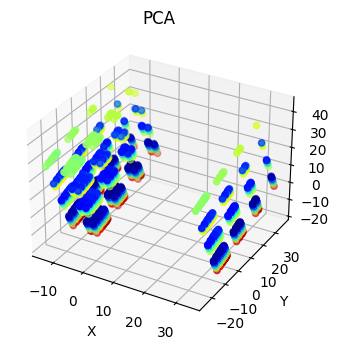

In [200]:
# Create a 3D plot

fig = plt.figure()

ax2 = fig.add_subplot(122, projection='3d')

# Plot the data points
ax2.scatter(pca_df[0], pca_df[1], pca_df[2], c=y, cmap='jet')
ax2.set_title('PCA')

# Set labels for the axes
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')
#ax2.axis('off')

# Function to rotate the plot
def rotate(event):
    ax2.view_init(elev=event.ydata, azim=event.xdata*4)
    fig.canvas.draw()

# Connect the rotate function to mouse events
fig.canvas.mpl_connect('motion_notify_event', rotate)

# Adjust the layout
fig.tight_layout()

# Show the plot
plt.show()

In [201]:
# Trying to use a different package for 3D visualization!
# This is the PCA plot btw
import plotly.graph_objects as go

# Define scaling range
scale_min = y.min()
scale_max = y.max()

# Create 3D scatter plot using Plotly
fig = go.Figure()
fig.add_trace(go.Scatter3d(
    x=pca_df[0], y=pca_df[1], z=pca_df[2],
    mode='markers',
    marker=dict(
        #size=(y - scale_min) / (scale_max - scale_min) * 10,  # Adjust the scaling factor as needed
        color=y,
        colorscale='jet',
        opacity=0.95,
        colorbar=dict(title='Predicted Delta E')
    ),
    name='Subplot 1'
))
#fig.add_trace(go.Scatter3d(
#    x=X_tsne[0], y=X_tsne[1], z=X_tsne[2],
#    mode='markers',
#    marker=dict(size=5),
#    name='Subplot 2'
#))
fig.update_layout(scene=dict(
    xaxis_title='X',
    yaxis_title='Y',
    zaxis_title='Z'
))
fig.show()

In [202]:
# Trying to use a different package for 3D visualization!
# This is the t-SNE plot btw
import plotly.graph_objects as go

# Define scaling range
scale_min = y.min()
scale_max = y.max()

# Create 3D scatter plot using Plotly
fig = go.Figure()
fig.add_trace(go.Scatter3d(
    x=tsne_df[0], y=tsne_df[1], z=tsne_df[2],
    mode='markers',
    marker=dict(
        size=5,   #(y - scale_min) / (scale_max - scale_min) * 5,  # Adjust the scaling factor as needed
        color=y,
        colorscale='jet',
        opacity=0.5,
        colorbar=dict(title='Predicted Delta E')
    ),
    name='Subplot 1'
))
#fig.add_trace(go.Scatter3d(
#    x=X_tsne[0], y=X_tsne[1], z=X_tsne[2],
#    mode='markers',
#    marker=dict(size=5),
#    name='Subplot 2'
#))
fig.update_layout(scene=dict(
    xaxis_title='X',
    yaxis_title='Y',
    zaxis_title='Z'
))
fig.show()

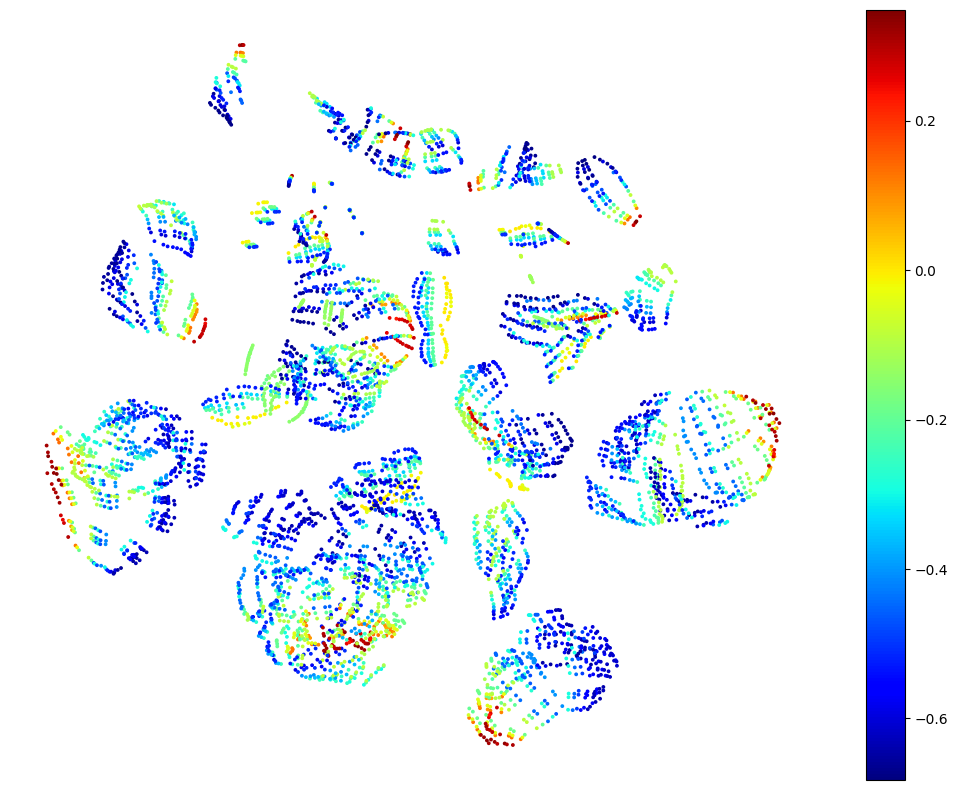

In [203]:
#t-SNE plot
plt.figure(figsize=(13,10))
plt.scatter(X_tsne[:,0],X_tsne[:,1], c=y, s=3, cmap='jet')
plt.axis('off')
plt.colorbar()
plt.show()

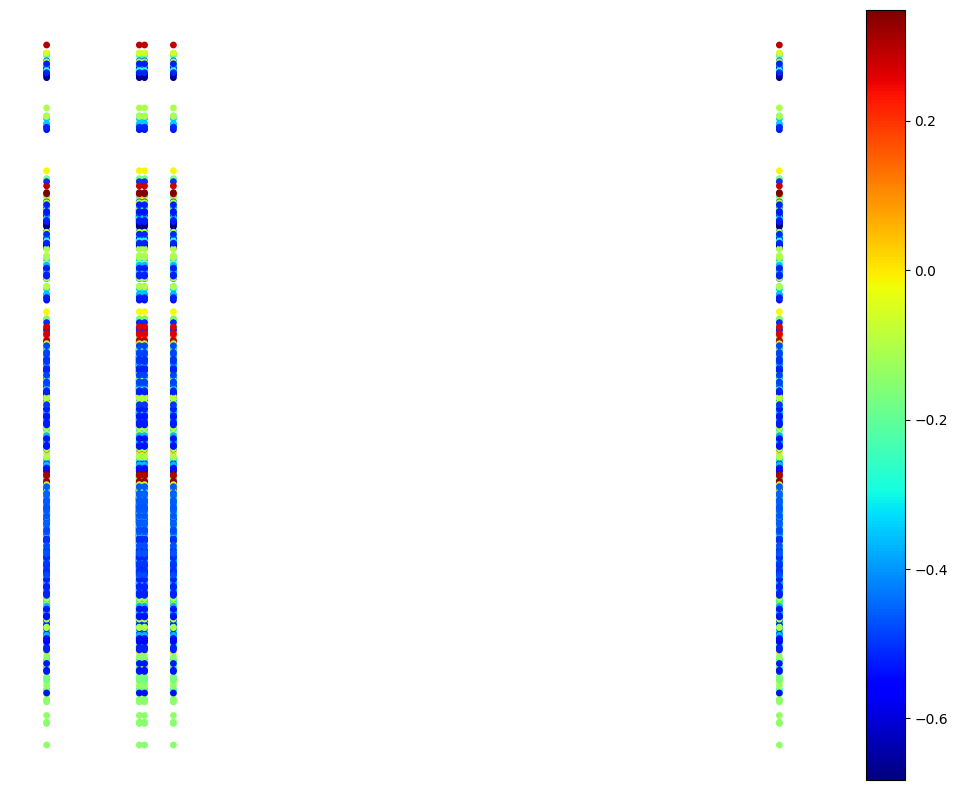

In [204]:
#PCA plot
plt.figure(figsize=(13,10))
plt.scatter(X_pca[:,0],X_pca[:,1], c=y, s=15, cmap='jet')
plt.axis('off')
plt.colorbar()
plt.show()

In [205]:
# Kmeans function to get a ton of different cluster information
# Changing this function to return a 2D array containing silhouette and inertias instead
from sklearn.cluster import KMeans

def run_kmeans_multiple_times(data, num_iterations):
    K_array = []


    for _ in range(num_iterations):

        if _ < 2:
          continue
        iteration = []
        kmeans = KMeans(n_clusters=(num_iterations - (num_iterations - _)))
        kmeans.fit(data)

        iteration.append(num_iterations - (num_iterations - _)) # Attaching cluster counts
        iteration.append(silhouette_score(data, kmeans.labels_)) # Attach silhouette scores
        iteration.append(kmeans.inertia_) # Attach inertia scores

        K_array.append(iteration)

    return K_array

In [206]:
pca_model = run_kmeans_multiple_times(pca_df, 50)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

In [207]:
tsne_model = run_kmeans_multiple_times(tsne_df, 50)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

In [208]:
# Graph silhouette scores
silhouette_per_pca = []
for arr in pca_model:
  silhouette_per_pca.append(arr[1])

In [209]:
# Graph silhouette scores
silhouette_per_tsne = []
for arr in tsne_model:
  silhouette_per_tsne.append(arr[1])

In [210]:
# Graph inertia scores
inertias_per_tsne = []
for arr in pca_model:
  inertias_per_tsne.append(arr[2])

In [211]:
# Graph inertia scores
inertias_per_pca = []
for arr in pca_model:
  inertias_per_pca.append(arr[2])

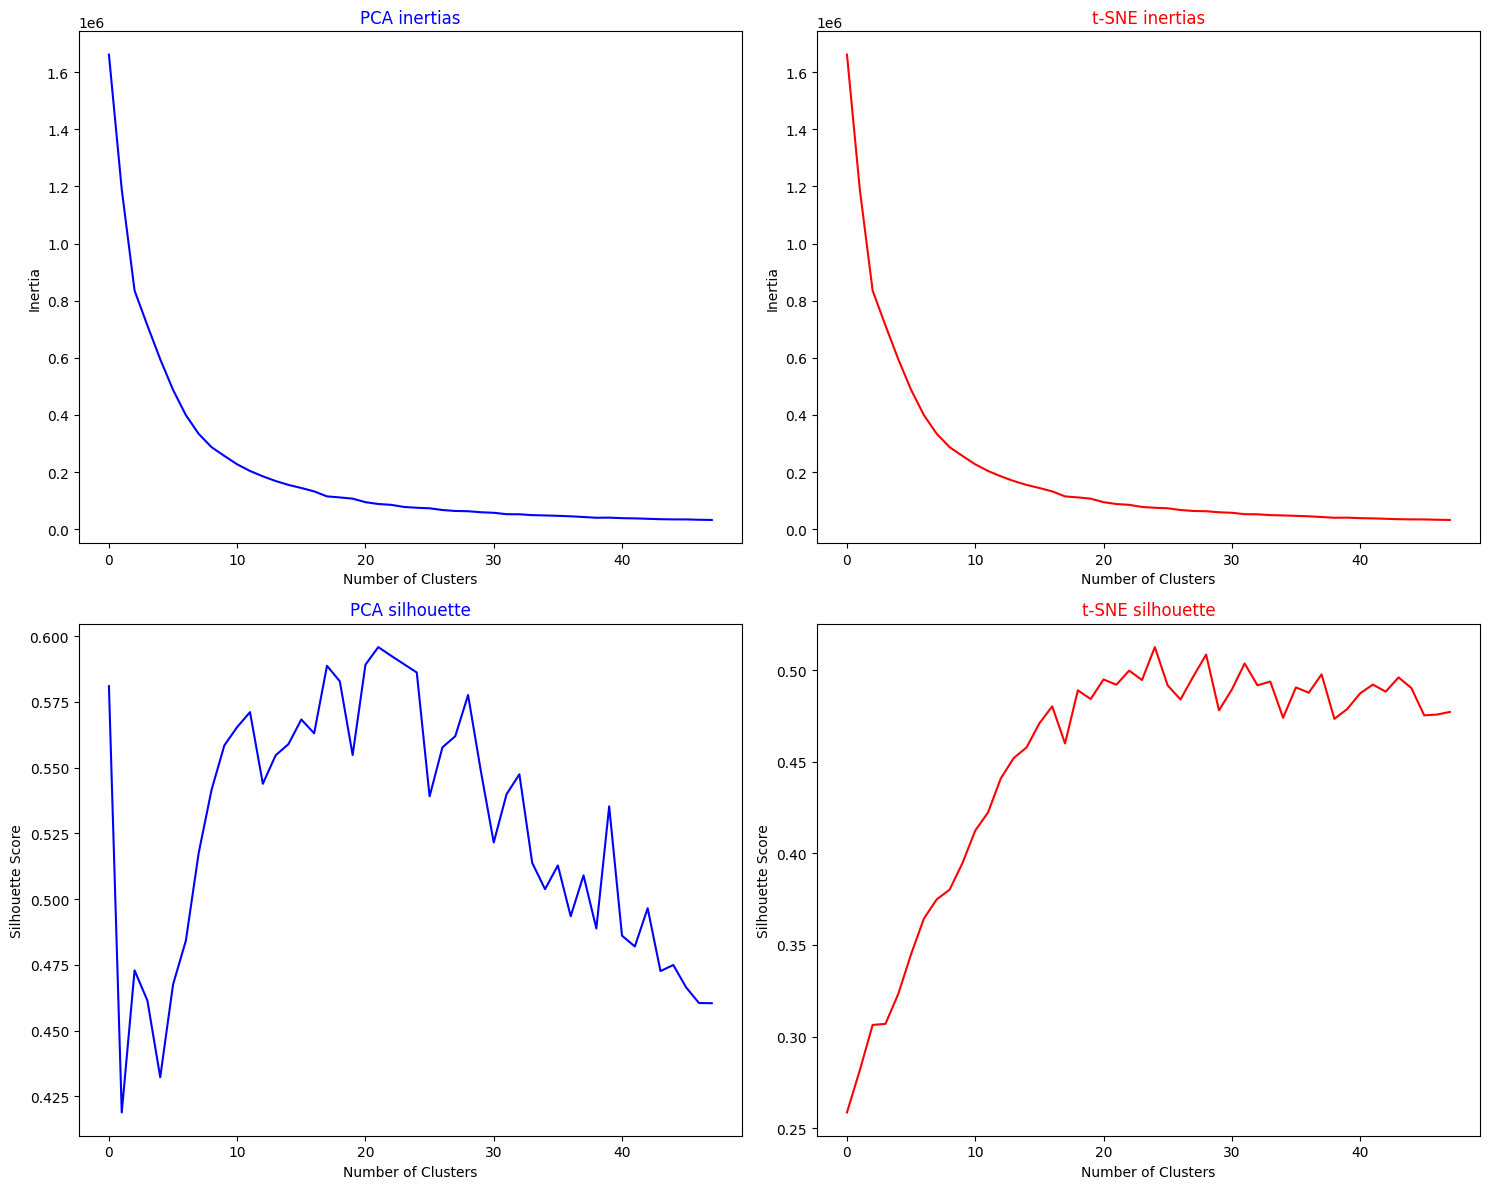

In [255]:
plt.figure(figsize=(15, 12))

# Subplot 1: PCA inertias
ax1 = plt.subplot(2, 2, 1)
ax1.plot(inertias_per_pca, color='blue')
ax1.set_xlabel('Number of Clusters')
ax1.set_ylabel('Inertia')
ax1.set_title("PCA inertias", color='blue')


# Subplot 2: t-SNE inertias
ax2 = plt.subplot(2, 2, 2)
ax2.plot(inertias_per_tsne, color='red')
ax2.set_xlabel('Number of Clusters')
ax2.set_ylabel('Inertia')
ax2.set_title("t-SNE inertias", color='red')


# Subplot 3: PCA silhouette
ax3 = plt.subplot(2, 2, 3)
ax3.plot(silhouette_per_pca, color='blue')
ax3.set_xlabel('Number of Clusters')
ax3.set_ylabel('Silhouette Score')
ax3.set_title("PCA silhouette", color='blue')


# Subplot 4: t-SNE silhouette
ax4 = plt.subplot(2, 2, 4)
ax4.plot(silhouette_per_tsne, color='red')
ax4.set_xlabel('Number of Clusters')
ax4.set_ylabel('Silhouette Score')
ax4.set_title("t-SNE silhouette", color='red')


plt.tight_layout()
plt.show()

In [249]:
#DBSCAN TIME BABY
from sklearn.cluster import DBSCAN
dbscan_tsne = DBSCAN(eps=1.95,min_samples=3)
dbscan_pca = DBSCAN(eps=0.75, min_samples=3)
dbscan_tsne.fit(tsne_df)
dbscan_pca.fit(pca_df)

DBSCAN(eps=0.75, min_samples=3)

In [242]:
dbscan_tsne.labels_[:50]

array([ 0,  1,  2,  3,  0,  0,  1,  2,  3,  0,  0,  1,  2,  3,  0,  4,  5,
        6,  7,  4,  8,  9, 10, 11,  8,  8,  9, 10, 11,  8,  8,  9, 10, 11,
        8,  8,  9, 10, 11,  8,  8,  9, 10, 11,  8,  4,  5,  6,  7,  4])

In [243]:
dbscan_pca.labels_[:50]

array([-1, -1, -1, -1, -1,  0, -1, -1, -1,  0,  0, -1, -1, -1,  0,  1, -1,
       -1, -1,  1,  2,  3,  4,  5,  2,  2,  3,  4,  5,  2,  2,  3,  4,  5,
        2,  2,  3,  4,  5,  2,  2,  3,  4,  5,  2,  6,  7,  8,  9,  6])

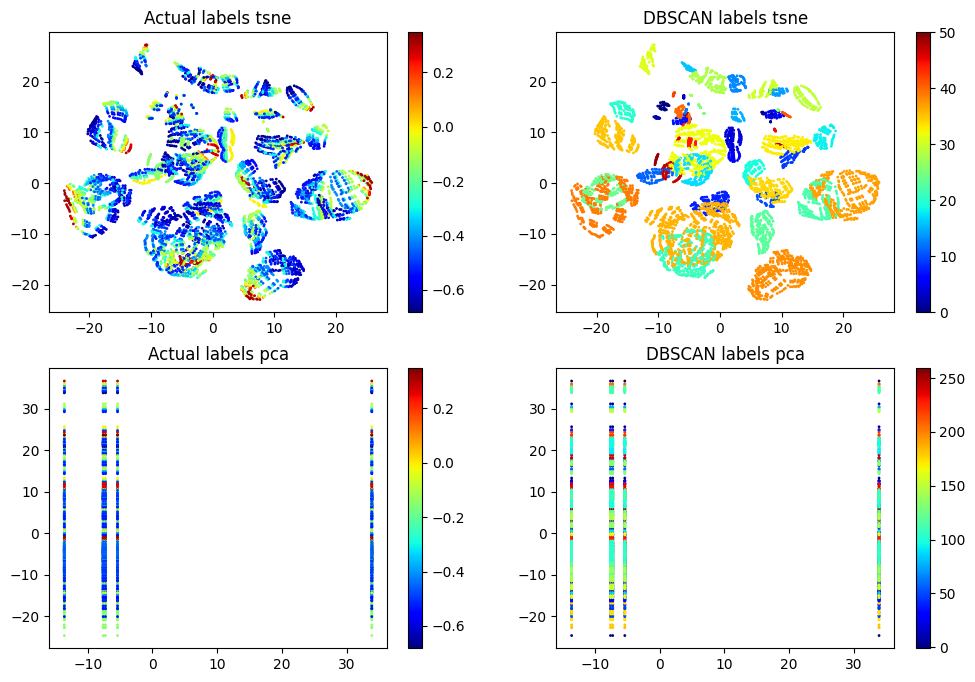

In [250]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
plt.scatter(X_tsne[:,0],X_tsne[:,1],c=y,s=1, cmap='jet')
plt.title("Actual labels tsne")
plt.colorbar()

plt.subplot(2,2,2)
plt.scatter(X_tsne[:,0],X_tsne[:,1],c=dbscan_tsne.labels_,s=1, cmap='jet')
plt.title("DBSCAN labels tsne")
plt.colorbar()

plt.subplot(2,2,3)
plt.scatter(X_pca[:,0],X_pca[:,1],c=y,s=1, cmap='jet')
plt.title("Actual labels pca")
plt.colorbar()

plt.subplot(2,2,4)
plt.scatter(X_pca[:,0],X_pca[:,1],c=dbscan_pca.labels_,s=1, cmap='jet')
plt.title("DBSCAN labels pca")
plt.colorbar()

plt.show()

In [251]:
labels_pca = dbscan_pca.labels_
silhouette_pca = silhouette_score(pca_df, labels_pca)
print(silhouette_pca)

0.3819665426338717


In [252]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels_pca)) - (1 if -1 in labels_pca else 0)
n_noise_ = list(labels_pca).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 260
Estimated number of noise points: 80


In [253]:
labels_tsne = dbscan_tsne.labels_
silhouette_pca = silhouette_score(tsne_df, labels_tsne)
print(silhouette_pca)

0.57423985


In [254]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels_tsne)) - (1 if -1 in labels_tsne else 0)
n_noise_ = list(labels_tsne).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 51
Estimated number of noise points: 0
